In [125]:
# Importing Required Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np

In [126]:
# Reading data
data = pd.read_csv('/Users/hoosiersaikap251/dataviz/docs/Final_Data.csv')
data_dependencies = pd.read_csv('/Users/hoosiersaikap251/dataviz/docs/dependencies_supports.csv')

Taking Features Related to ROI Metric

| Feature Name                      | Description                                                                                       |
|----------------------------------|---------------------------------------------------------------------------------------------------|
| aligns_with_okrs                 | Indicates alignment with company OKRs (Yes/No or True/False)                                     |
| supports_key_initiative          | Whether the idea supports a key business initiative (e.g., AI push, sustainability)              |
| compliance_or_regulatory_benefit | Does the idea contribute to regulatory or compliance needs? (True/False)                         |
| innovation_score                 | Innovation score based on novelty or uniqueness (1-5)                                            |
| executive_priority_flag          | Flag for executive or leadership priority (True/False)                                           |
| strategic_timeline_alignment     | Whether the idea fits into the current strategic timeline or roadmap (True/False)               |
| mission_critical_flag            | Marks if the idea is mission-critical to business success (True/False)                           |
| long_term_value_score            | Score reflecting potential for long-term strategic value (1-5)                                   |


In [127]:
df_SA = data[['Title','Description','aligns_with_okrs', 'supports_key_initiative', 'compliance_or_regulatory_benefit', 
                    'innovation_score', 'executive_priority_flag', 'strategic_timeline_alignment', 
                    'mission_critical_flag', 'long_term_value_score']]
df_SA['supports_key_initiative'] = df_SA['supports_key_initiative'].fillna('Unknown').copy()
df_SA.head()

/var/folders/jr/cx9v05mj76767q_pxc111nvr0000gn/T/ipykernel_12350/1053224804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA['supports_key_initiative'] = df_SA['supports_key_initiative'].fillna('Unknown').copy()


,Title,Description,aligns_with_okrs,supports_key_initiative,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score
0,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...,True,Automation,True,5,True,False,False,2
1,Cloud-Based Ago Analyzer,Cloud-Based Ago Analyzer is focused on optimiz...,False,Unknown,True,4,True,False,True,5
2,Intelligent Face Bot,Intelligent Face Bot is focused on streamlinin...,False,Sustainability,False,5,False,True,True,1
3,AI-Powered Dog System,AI-Powered Dog System is focused on reducing m...,False,Sustainability,False,2,True,True,False,5
4,Predictive Since Agent,Predictive Since Agent is focused on improving...,False,Unknown,False,5,False,True,True,3


In [128]:
df_SA = df_SA.merge(data_dependencies[['Title', 'Num Supports']], on='Title', how='left')
df_SA.head(1)

,Title,Description,aligns_with_okrs,supports_key_initiative,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score,Num Supports
0,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...,True,Automation,True,5,True,False,False,2,5


One-hot encoding is used to convert categorical values into binary indicator columns.
This allows machine learning models to interpret categorical data without assuming any ordinal relationship.
Each unique category in the original column becomes a separate column with 0 or 1 values.

In [129]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df_SA[['supports_key_initiative']])
encoded_cols = encoder.get_feature_names_out(['supports_key_initiative'])
df_encoded = pd.DataFrame(encoded_array, columns=encoded_cols)
df_SA = pd.concat([df_SA.drop(columns=['supports_key_initiative']), df_encoded], axis=1)

In [130]:
df_SA.head(3)

,Title,Description,aligns_with_okrs,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score,Num Supports,supports_key_initiative_AI,supports_key_initiative_Automation,supports_key_initiative_Sustainability,supports_key_initiative_Unknown
0,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...,True,True,5,True,False,False,2,5,0,1,0,0
1,Cloud-Based Ago Analyzer,Cloud-Based Ago Analyzer is focused on optimiz...,False,True,4,True,False,True,5,3,0,0,0,1
2,Intelligent Face Bot,Intelligent Face Bot is focused on streamlinin...,False,False,5,False,True,True,1,5,0,0,1,0


In [131]:
boolean_columns = ['aligns_with_okrs', 'compliance_or_regulatory_benefit', 
                   'executive_priority_flag', 'strategic_timeline_alignment', 
                   'mission_critical_flag']

df_SA[boolean_columns] = df_SA[boolean_columns].replace({True: 1, False: 0})
df_SA.head(3)

/var/folders/jr/cx9v05mj76767q_pxc111nvr0000gn/T/ipykernel_12350/1509345469.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_SA[boolean_columns] = df_SA[boolean_columns].replace({True: 1, False: 0})


,Title,Description,aligns_with_okrs,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score,Num Supports,supports_key_initiative_AI,supports_key_initiative_Automation,supports_key_initiative_Sustainability,supports_key_initiative_Unknown
0,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...,1,1,5,1,0,0,2,5,0,1,0,0
1,Cloud-Based Ago Analyzer,Cloud-Based Ago Analyzer is focused on optimiz...,0,1,4,1,0,1,5,3,0,0,0,1
2,Intelligent Face Bot,Intelligent Face Bot is focused on streamlinin...,0,0,5,0,1,1,1,5,0,0,1,0


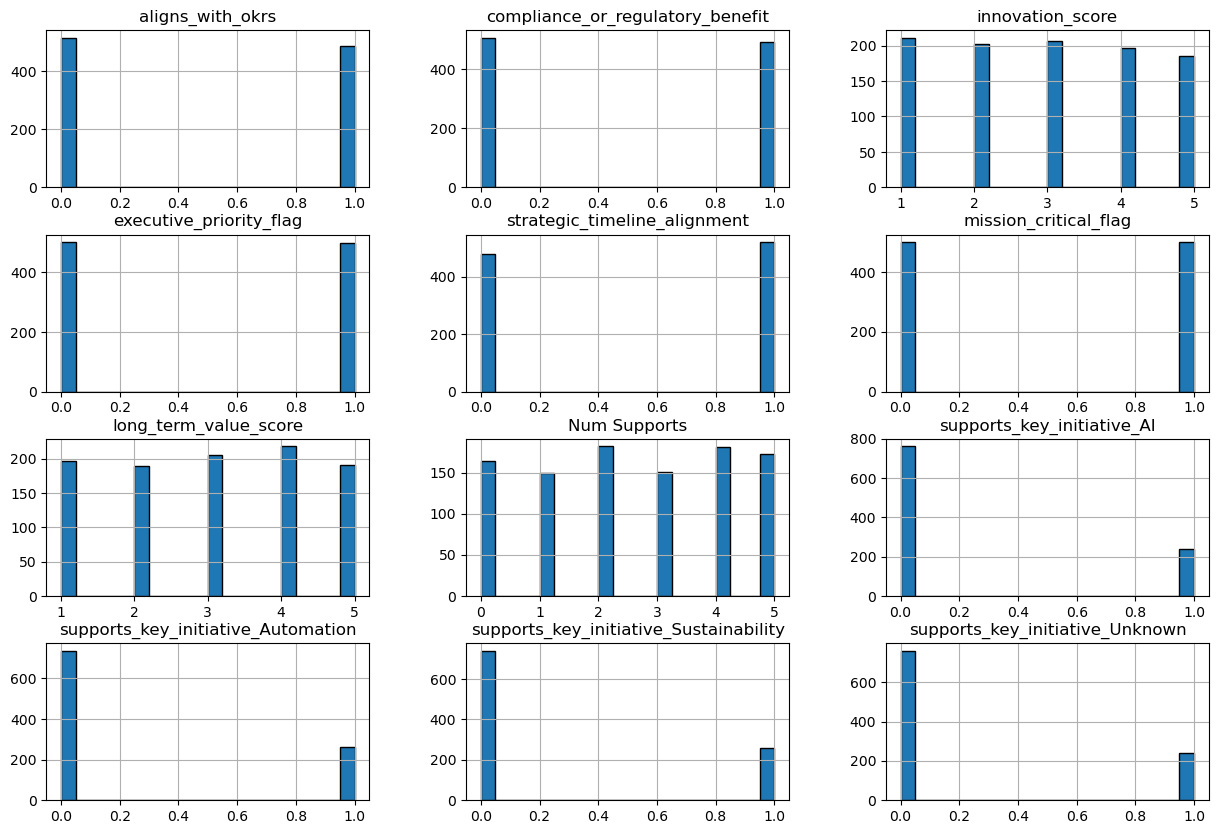

In [132]:
df_SA.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.show()

Normalizing the Data based on Min-Max Scaling 

In [133]:
numerical_columns = df_SA.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler(feature_range=(0, 1))
df_SA_normalized = df_SA.copy()
df_SA_normalized[numerical_columns] = scaler.fit_transform(df_SA[numerical_columns])
df_SA_normalized.head(1)

,Title,Description,aligns_with_okrs,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score,Num Supports,supports_key_initiative_AI,supports_key_initiative_Automation,supports_key_initiative_Sustainability,supports_key_initiative_Unknown
0,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...,1.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,0.0,0.0


In [134]:
# Keeping the Target Label Randomly (Although it will depend upon the labeled data from the upstream)
df_SA_normalized['target'] = np.random.rand(len(df_SA_normalized))

In [135]:
# Train, Val and Test Split For Training Random Forest Model
from sklearn.model_selection import train_test_split

df_train,df_temp = train_test_split(df_SA_normalized, train_size=800, random_state=42)
df_val, df_test = train_test_split(df_SA_normalized, test_size=100, random_state=42)

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Training the Model
X = df_train[numerical_columns]
y = df_train['target']


rf_regressor = RandomForestRegressor(n_estimators=100,random_state=42)
rf_regressor.fit(X, y)

# Val Set
X_val = df_val[numerical_columns]
y_val = df_val['target']
y_pred = rf_regressor.predict(X_val)


mse = mean_squared_error(y_val, y_pred)
print(f"MSE: {mse}")

MSE: 0.024462643987594665


Feature importance indicates how much each feature contributes to the predictive power of the model.
Higher importance values mean the feature plays a bigger role in the model’s decisions.
This helps with model interpretability and can guide feature selection or engineering.

In [137]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_


importances_df = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                                   Feature  Importance
7                             Num Supports    0.181646
6                    long_term_value_score    0.168365
2                         innovation_score    0.165885
1         compliance_or_regulatory_benefit    0.073974
4             strategic_timeline_alignment    0.072635
3                  executive_priority_flag    0.071416
5                    mission_critical_flag    0.055410
9       supports_key_initiative_Automation    0.048277
0                         aligns_with_okrs    0.045711
10  supports_key_initiative_Sustainability    0.041694
11         supports_key_initiative_Unknown    0.037952
8               supports_key_initiative_AI    0.037034


In [138]:
importances_df.to_csv('feature_importances_SA.csv', index=False)

In [139]:
feature_weights = pd.Series(feature_importances, index=X.columns)

In [140]:
import altair as alt

# Create a histogram for feature importance
chart = alt.Chart(importances_df).mark_bar().encode(
    x=alt.X('Feature', sort='-y', title='Features'),
    y=alt.Y('Importance', scale=alt.Scale(domain=[0, 1]), title='Importance'),
    tooltip=['Feature', 'Importance']
).properties(
    title='Feature Importance Histogram',
    width=600,
    height=400
)
chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [141]:
df_train['sa_target'] = df_train[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)

In [142]:
df_train_sorted = df_train.sort_values(by='sa_target', ascending=False)
df_train_sorted.head(2)

,Title,Description,aligns_with_okrs,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score,Num Supports,supports_key_initiative_AI,supports_key_initiative_Automation,supports_key_initiative_Sustainability,supports_key_initiative_Unknown,target,sa_target
185,Predictive System Optimizer,Predictive System Optimizer is focused on opti...,0.0,1.0,1.0,1.0,1.0,1.0,0.75,1.0,0.0,1.0,0.0,0.0,0.732598,0.795518
657,Smart Store Dashboard,Smart Store Dashboard is focused on enhancing ...,0.0,1.0,1.0,1.0,1.0,1.0,0.75,1.0,1.0,0.0,0.0,0.0,0.554567,0.784275


In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Test Set
X_val = df_test[numerical_columns]
y_test = df_test['target']
y_pred = rf_regressor.predict(X_val)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.09489836645790219


In [144]:
# Assigning Weights to the Features for whole Dataset
df_all=df_SA_normalized.copy()
df_all['SA_Score'] = df_all[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)

In [145]:
df_all.to_csv('df_all_SA.csv', index=False)